<h3> Elementy statystyki opisowej i podstawy rachunku prawdopdobieństwa

In [1]:
library(moments)

In [2]:
options(repr.plot.width=3, repr.plot.height=3) #ustawia rozmiar obrazka

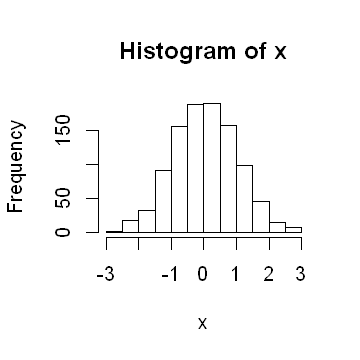

In [45]:
x = rnorm(1000) #generuje dane z rozkladu normalnegos
hist(x)

In [5]:
range(x); mean(x); median(x); sd(x); var(x)

[1] -3.784815  2.696052

[1] -0.0160636

[1] -0.03128469

[1] 1.029624

[1] 1.060126

In [6]:
quantile(x, 0.05); quantile(x, 0.50) #kwantyle 

5% 
-1.699703

50% 
-0.03128469

In [18]:
skewness(x) #skośność

[1] 0.05300179

In [7]:
kurtosis(x) #kurtoza, dla rozkladu normalnego 3 

[1] 3.06028

<h4> Rozkład Weibull'a

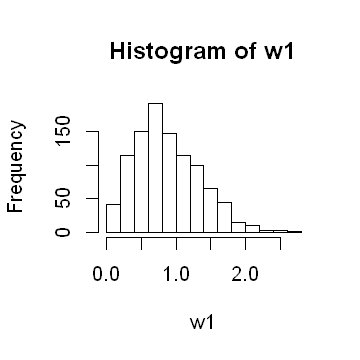

In [8]:
w1 = rweibull(1000, 2, 1)
hist(w1)

In [9]:
skewness(w1) #rozklad przesuniety w lewo - dodatnia skośność

[1] 0.6146645

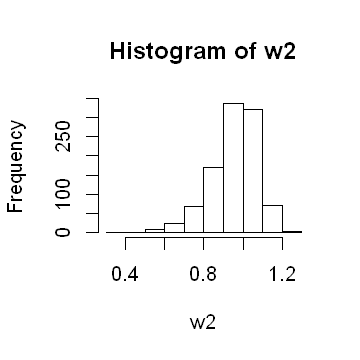

In [10]:
w2 = rweibull(1000, 10, 1)
hist(w2)

In [11]:
skewness(w2) #rozklad przesuniety w prawo - ujemna skośność

[1] -0.7869818

Wartość dystrybuanty rozkładu normalnego

In [12]:
pnorm(0) #wartosc dystrybuanty rozkladu normalnego w punkcie 0, czyli F(0)

[1] 0.5

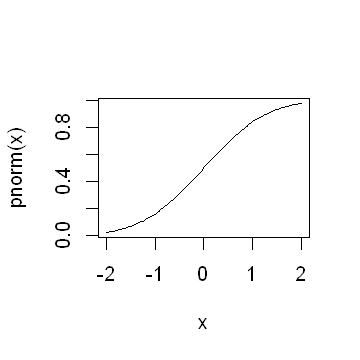

In [54]:
curve(pnorm, from=-2, to=2)

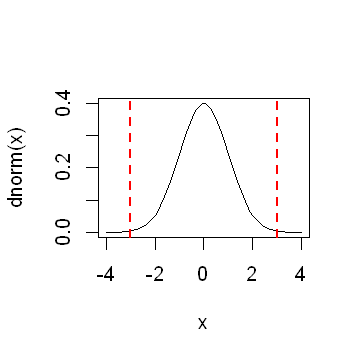

In [14]:
curve(dnorm, from=-4, to=4) #funkcja gęstosci rozkladu normalnego
abline(v=c(-3,3), col="red", lty=2, lwd=2) #pionowe linie

In [49]:
#regula 3 sigm:
pnorm(3)-pnorm(-3)

[1] 0.9973002

<h4>Zadanie1: Jakie jest prawdopodbieństwo, że wylosujemy liczbę z przedziału $<-2,1>$ jeżeli losujemy z populacji opisanej przez rozkład normalny $N(0,1)$?

<h3> Gdzie rozkład normalny pojawia się naturalnie?

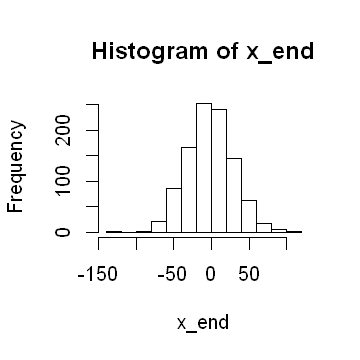

In [16]:
#Spacer losowy po osi

x_end = c()
for (i in 1:1000){
    t = sample(c(-1,1), 1000, rep = T)
    x_end = append(x_end, sum(t))
}

hist(x_end)

<h3> Jak wygenerować dane z dowolnego rozkładu znając funkcję gęstości i mając do dyspozycji rozkład jednostajny?

In [17]:
dens.norm = function(x){
    return((1/(sqrt(2*pi)))*exp(-x^2/2))
}

In [18]:
dens.norm(2); dnorm(2) #porownanie z wbudowana funkcją

[1] 0.05399097

[1] 0.05399097

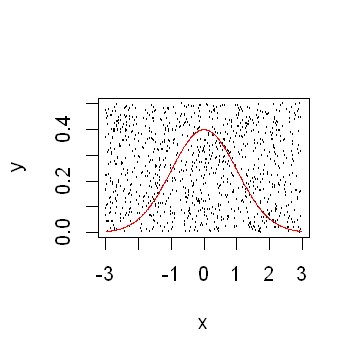

In [19]:
x = sort(runif(1000, -3,3))
y = runif(1000, 0,0.5)

plot(x, y, cex = 0.1)
lines(x, dens.norm(x), col = "red")

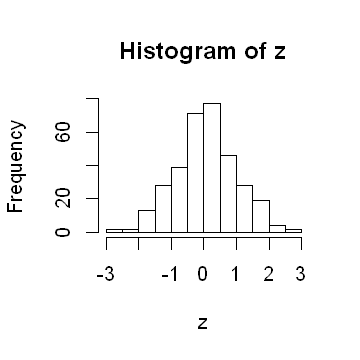

In [20]:
z = x[y<dens.norm(x)] 
hist(z)

<h3> Jak wygenerować dane z rozkładu jednostajnego?

In [1]:
#wiecej np tutaj https://pl.wikipedia.org/wiki/Generator_Lehmera

X = c(2^(31))
n = 2^(31) - 1
g = 7^5

for (i in 1:4000){
    X = append(X, g*X[length(X)] %% n)
}

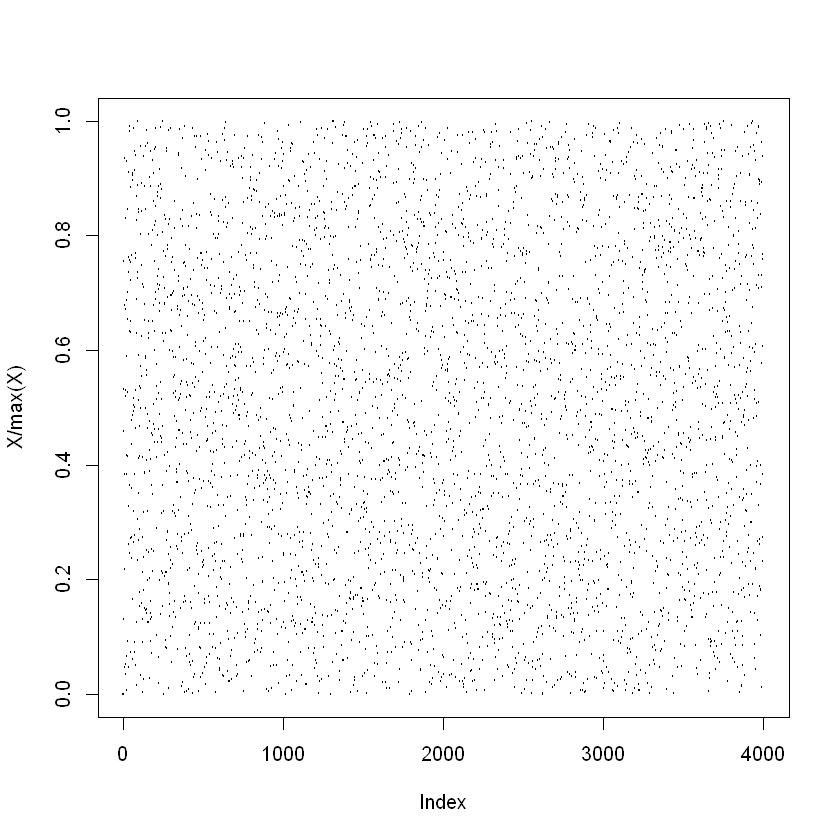

In [3]:
plot(X/max(X), cex = 0.1)

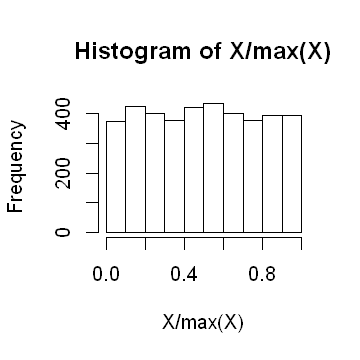

In [23]:
hist(X/max(X))

<h3> Prawa wielkich liczb

<h4> Zadanie2: Wykonaj następujący eksperyment. Wylosuj kolejno 1,2,3.... oraz 1000 liczb losowych z rozkładu normalnego $N(2,3)$ każdorazowo licząc średnią i odchylenie. Następnie narysuj dwa wykresy zależności: średniej od liczby wylosowanych liczb oraz odchylenia od liczby wylosowanych liczb.

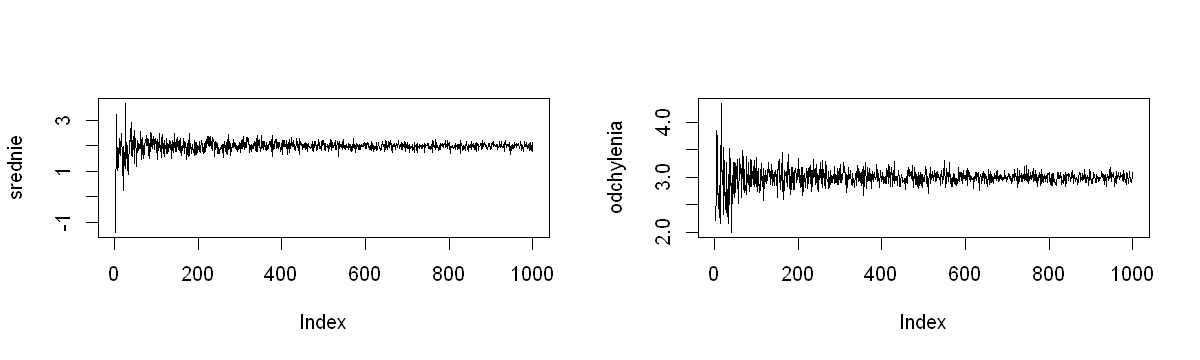

In [24]:
#oczekiwany wynik

<h4> Zadanie3: Wykonaj następujący eksperyment. Rzucamy kostką 1 raz, 2 razy,...., 1000 razy. Za każdym razem wyznaczamy częstości wystąpienia 1,2,3,4,5 oraz 6 oczek. Narysuj na jednym wykresie te częstości dla kolejnych rzutów. Podaj częstości dla ostatniej sytuacji.

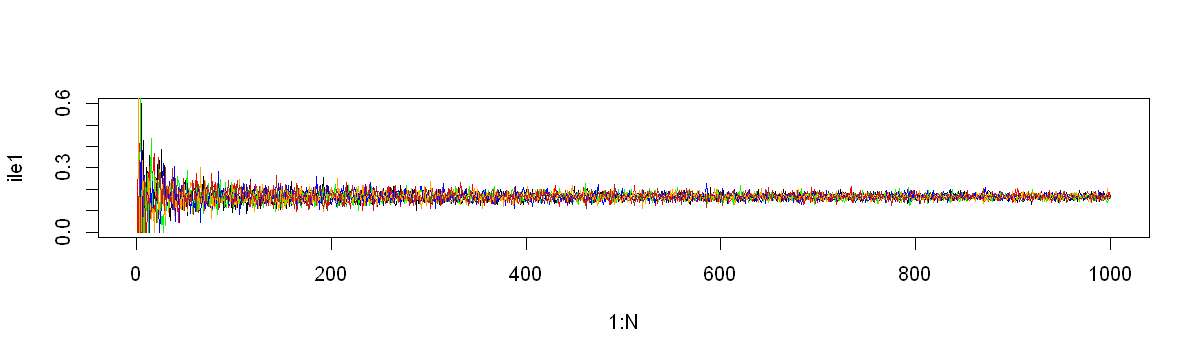

In [25]:
#oczekiwany wynik

In [26]:
#oczekiwny wynik (przykladowe wyniki)

[1] 0.169

[1] 0.16

[1] 0.16

[1] 0.173

[1] 0.175

[1] 0.163

<h4> Zadanie4: Jakie jest prawdopodobieństwo, że w rzucie 100 razy kostką do gry wylosujemy dokładnie 16 razy szóstkę? Zadanie rozwiąż na 2 sposoby:

- wyznacz dokładną wartość na podstawie rozkładu Bernoulliego
- wyznacz przybliżoną wartość poprzez symulację 100 tys razy tego eksperymentu.

In [27]:
#oczekiwana wartosc teoretyczna

[1] 0.1065014

In [28]:
#wartosc z symulacji (przykladowa)

[1] 0.10725


<h4> Zadanie5: Mając $5$ zł wchodzimy z nimi do następującej gry. Mamy do dyspozycji niesymetryczną monetę, w której z prawdopodobieństwem $p=0.6$ wypada orzeł. Rzucamy monetą, jeżeli wypadnie orzeł to otrzymujemy $1$ zł, w przeciwnym przypadku oddajemy $1$ zł. Grę kończymy, gdy osiągniemy $1000$ zł lub $0$ zł. Jakie jest prawdopodobieństwo, że wygramy w takiej grze? Czy taka gra jest dla nas opłacalna? Ile należałoby mieć na początku, żeby na $99 \%$ być pewnym wygranej?

In [29]:
#powinno wyjsc cos ok tego

[1] 0.8683128

<h4> Centralne twierdzenie graniczne

CTW: $\frac{\sum X_i - n\mu}{\sigma \sqrt{n}} \rightarrow N(0,1)$.

Powtarzamy 1000 razy następujący eksperyment: 

- Rzucamy 100 razy kostką do gry, następnie zapisujemy sumę oczek ($X_1+X_2+...+X_{100} = \sum X_i$)
- Przekształcamy tę sumę na $\frac{\sum X_i - n\mu}{\sigma \sqrt{n}}$, gdzie $\mu = 3.5$ oraz $\sigma = 2.917$ to suma i odchylenie dla zmiennej losowej opisującej rzut kostką, $n=100$.
- Zapisujemy ten wynik do wektora.

W efekcie otrzymujemy 1000 liczb. Jaki rozkład będą miały te wartości?

In [57]:
liczby = c()
for (i in 1:1000){
    t = sum(sample(1:6, 100, rep=T))
    t = (t-100*3.5)/(2.917*sqrt(100))
    liczby = append(liczby, t)
}

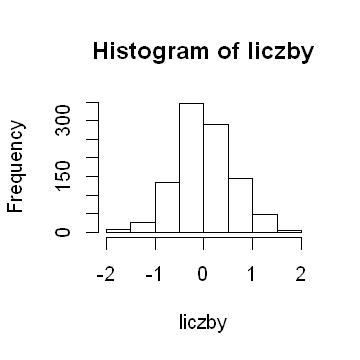

In [58]:
options(repr.plot.width=3, repr.plot.height=3)
hist(liczby) #okazuje sie ze normalny

<h4> Zadanie6: Na statku jest 100 dorosłych osób. Waga w populacji opisana jest rozkładem $N(80, 20)$. Jakie jest prawdopodobieństwo, że waga tych osób nie przekroczy 8200 kg? Wykonaj zadanie na 2 sposoby:
 
- wykonując 100000 symulacji tej sytuacji do oszacowania prawdopodobieństwa,
- wykorzystując Centralne Twierdzenie Graniczne
    
Czy założenie o normalności jest tutaj istotne?

In [34]:
#z symulacji

[1] 0.84011

<h4> Zadanie7: Zaprosiłeś na imprezę 64 osoby. Będziesz przygotowywał kanapki. Każdy gość zje 0, 1 lub 2 kanapki z prawdopodobieństwm 0.25, 0.50 i 0.25 odpowiednio. Ile co najmniej powinieneś przygotować kanapek aby na 95 % być pewnym, że wystarczy?

Założmy, że zadajemy ludziom pytanie na które mogą odpowiedzieć tylko na 2 sposoby (np. TAK lub NIE). Niech $p$ oznacza prawdopodobieństwo uzyskania pierwszej odpowiedzi, przy czym $p$ jest zmienną losową. Niech $p^*$ oznacza prawdopodobieństwo aproksymujące $p$ na podstawie próby $n$- elementowej. Wtedy $p \sim N(p^*, \sqrt{\frac{p^*(1-p^*)}{n}})$

<h4> Zadanie8* (nieobowiązkowe): Pokaż, że powyższa relacja jest konsekwencją Centralnego Twierdzenia Granicznego.

<h4> Zadanie9: Aby ocenić szanse wyborcze partii $X$ przeprowadzono ankietę. W tym celu wybrano losowo 300 osób i zapytano o stostunek do partii $X$. 140 z nich odpowiedziało, że zagłosuje za partią $X$. Jakie jest prawdopodobieństwo, że w całej populacji ta partia uzyska mniej niż 43%?